In [151]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Set style untuk visualisasi
sns.set(style="whitegrid")

In [152]:
# Load dataset
dataset = "Mall_Customers.csv"
df = pd.read_csv(dataset)

In [153]:
# Tampilkan 5 baris pertama dataset
print("Preview Dataset:")
print(df.head())

Preview Dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [154]:
# Informasi dasar tentang dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None



Statistik Deskriptif:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


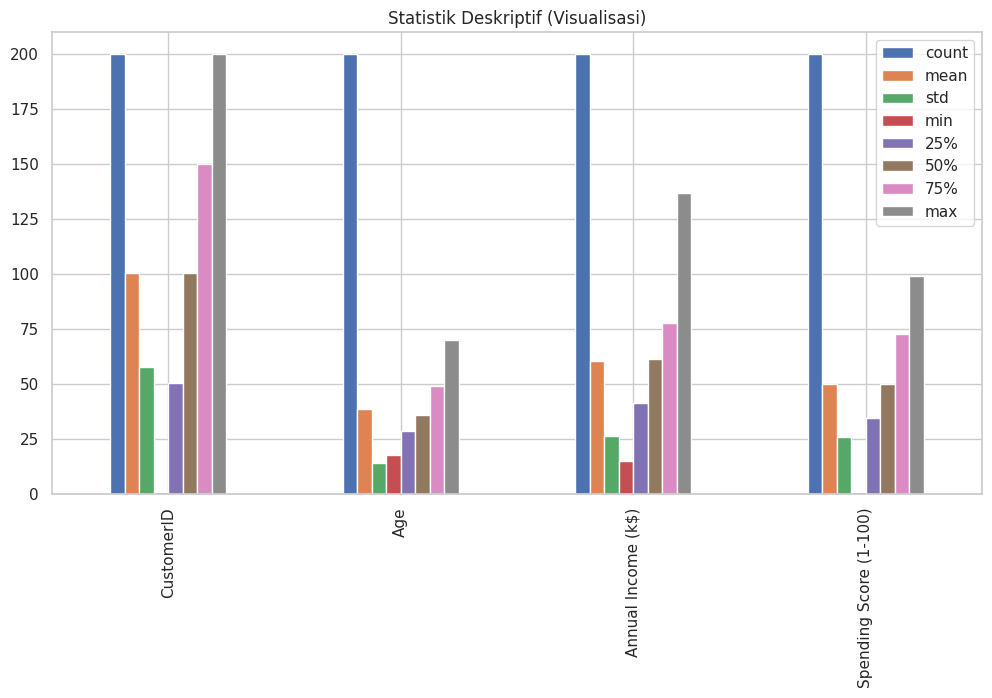

In [155]:
# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
print(df.describe())

# Visualisasi Statistik Deskriptif
df.describe().T.plot(kind='bar', figsize=(12, 6), title='Statistik Deskriptif (Visualisasi)')
plt.show()


Distribusi Gender:
Gender
Female    112
Male       88
Name: count, dtype: int64


<ipython-input-156-5f9e640ee0ac>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


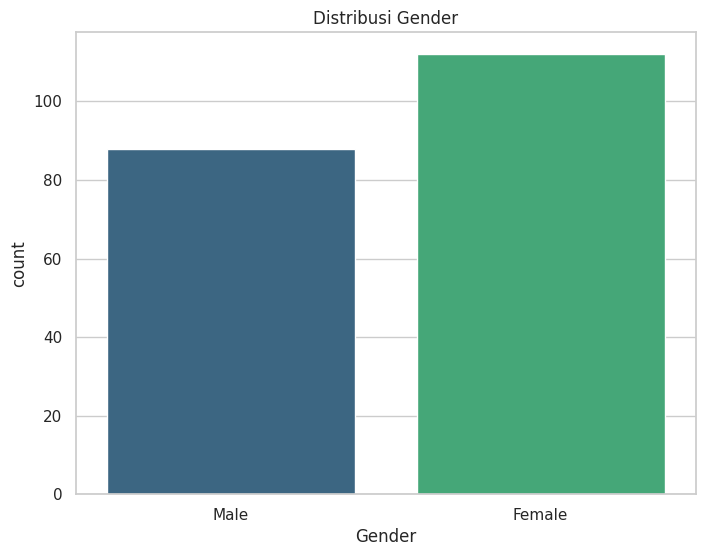

In [156]:
# Distribusi Gender
print("\nDistribusi Gender:")
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

# Visualisasi Distribusi Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribusi Gender')
plt.show()


Distribusi Usia (Age):
count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


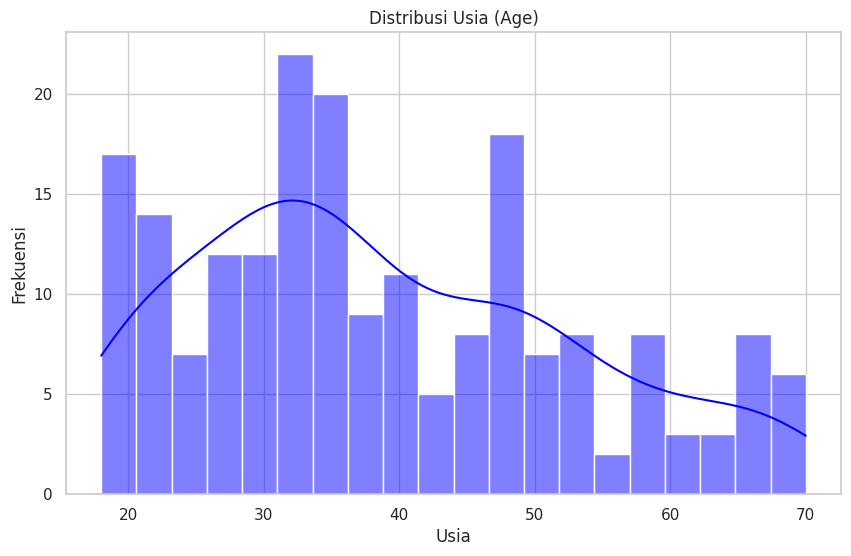

In [157]:
# Distribusi Usia (Age)
print("\nDistribusi Usia (Age):")
print(df['Age'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribusi Usia (Age)')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


Distribusi Pendapatan Tahunan (Annual Income):
count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


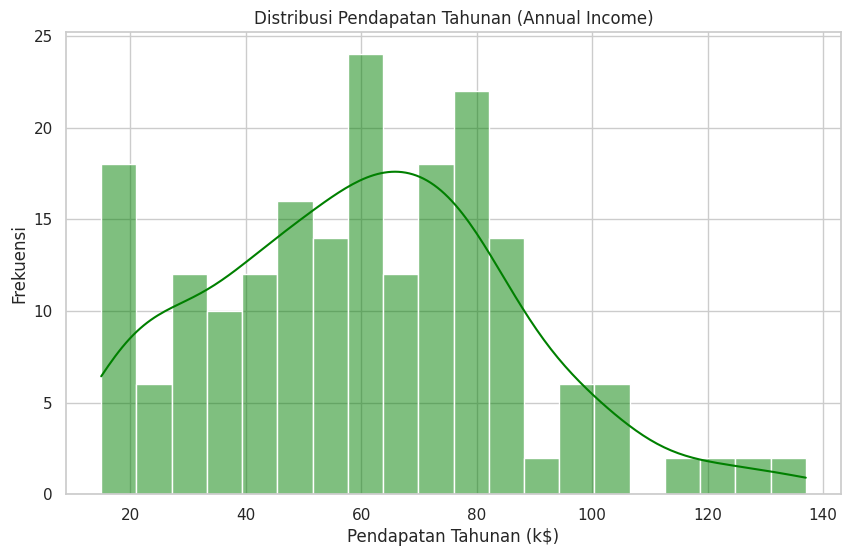

In [158]:
# Distribusi Pendapatan Tahunan (Annual Income)
print("\nDistribusi Pendapatan Tahunan (Annual Income):")
print(df['Annual Income (k$)'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Distribusi Pendapatan Tahunan (Annual Income)')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Frekuensi')
plt.show()


Distribusi Skor Belanja (Spending Score):
count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


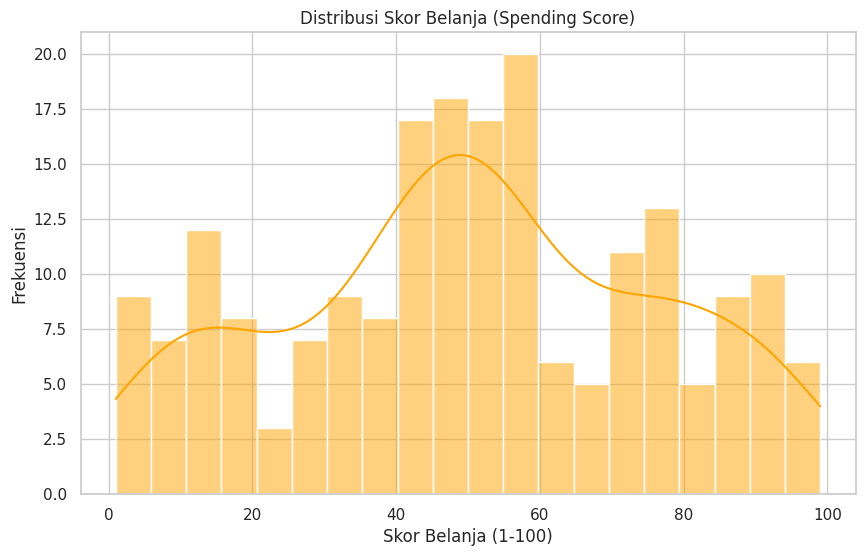

In [159]:
# Distribusi Skor Belanja (Spending Score)
print("\nDistribusi Skor Belanja (Spending Score):")
print(df['Spending Score (1-100)'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='orange')
plt.title('Distribusi Skor Belanja (Spending Score)')
plt.xlabel('Skor Belanja (1-100)')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-160-996ef3c58b59>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, palette='viridis')
<ipython-input-160-996ef3c58b59>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='viridis')
<ipython-input-160-996ef3c58b59>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='viridis')


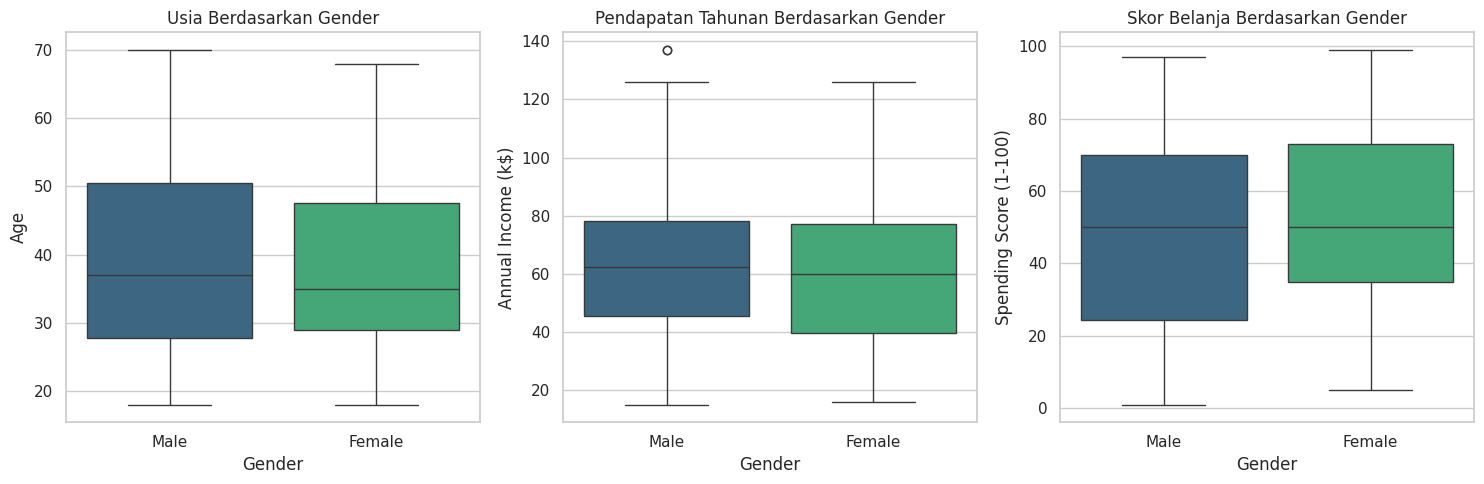

In [160]:
# Box Plot untuk Usia, Pendapatan, dan Skor Belanja Berdasarkan Gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Age', data=df, palette='viridis')
plt.title('Usia Berdasarkan Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='viridis')
plt.title('Pendapatan Tahunan Berdasarkan Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Skor Belanja Berdasarkan Gender')

plt.tight_layout()
plt.show()


Matriks Korelasi:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


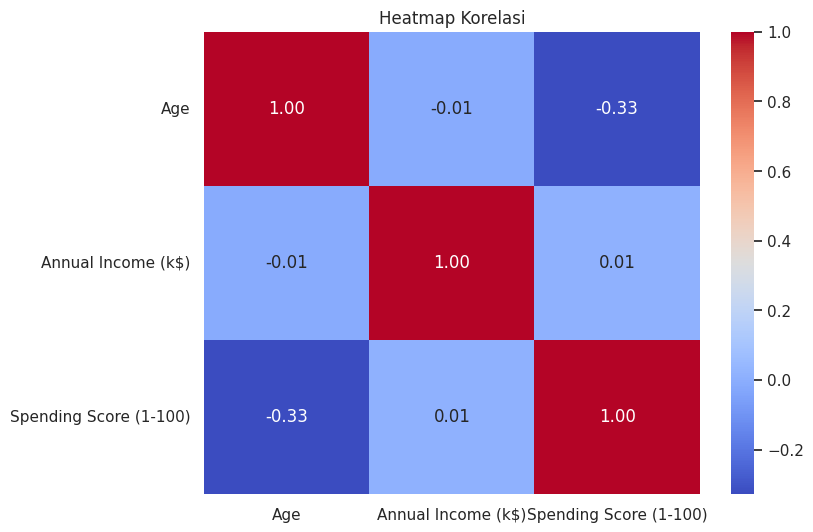

In [161]:
# Korelasi Antar Variabel Numerik
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print("\nMatriks Korelasi:")
print(corr_matrix)

# Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

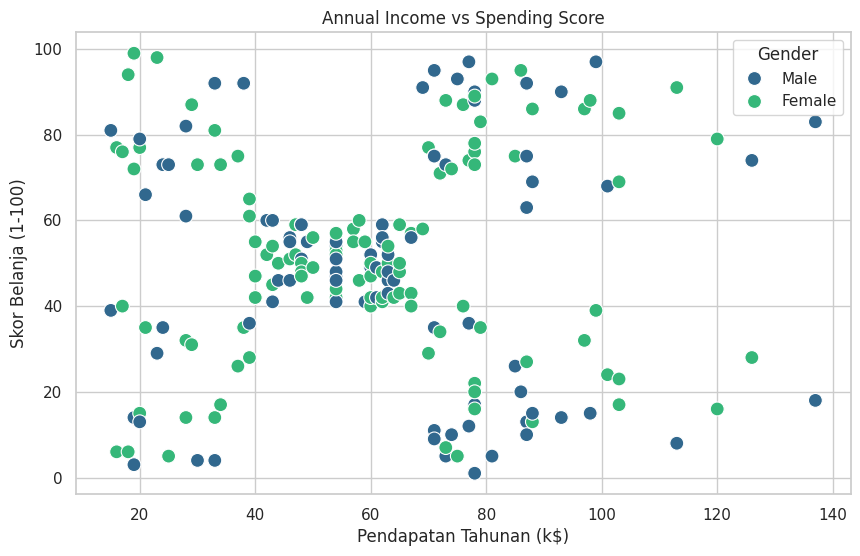

In [162]:
# Scatter Plot: Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='viridis', s=100)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Belanja (1-100)')
plt.legend(title='Gender')
plt.show()

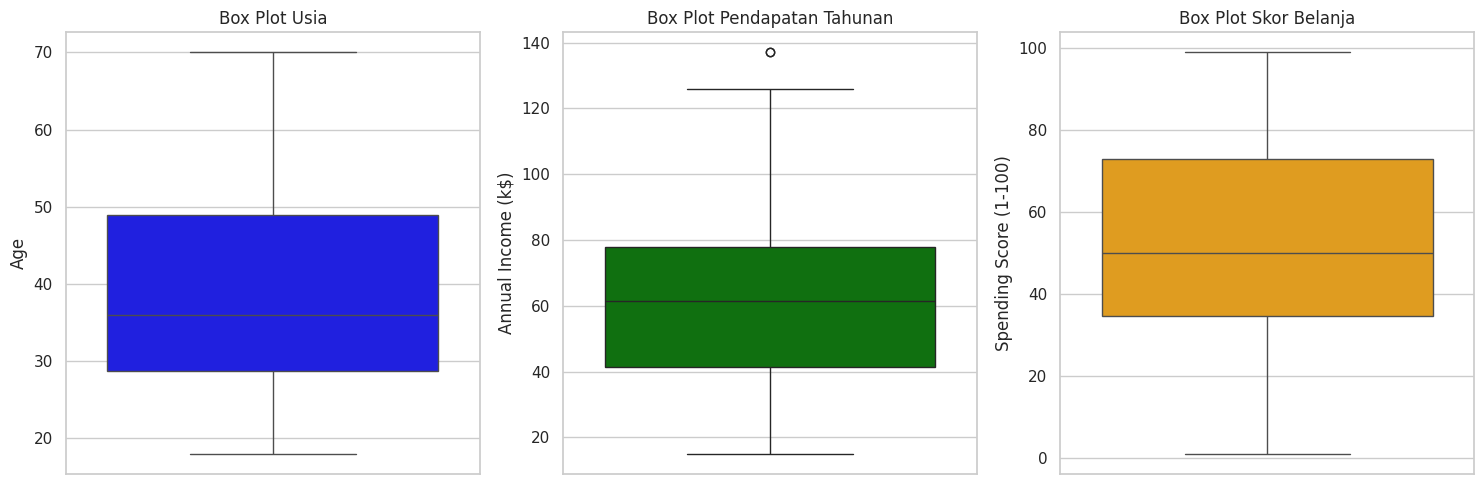

In [163]:
# Analisis Outlier dengan Box Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y='Age', data=df, color='blue')
plt.title('Box Plot Usia')

plt.subplot(1, 3, 2)
sns.boxplot(y='Annual Income (k$)', data=df, color='green')
plt.title('Box Plot Pendapatan Tahunan')

plt.subplot(1, 3, 3)
sns.boxplot(y='Spending Score (1-100)', data=df, color='orange')
plt.title('Box Plot Skor Belanja')

plt.tight_layout()
plt.show()

In [164]:
# Analisis Outlier secara Numerik
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Annual Income (k$)'] < (Q1 - 1.5 * IQR)) | (df['Annual Income (k$)'] > (Q3 + 1.5 * IQR))]
print("\nOutlier pada Pendapatan Tahunan:")
print(outliers)


Outlier pada Pendapatan Tahunan:
     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83



Distribusi Kelompok Usia:
Age Group
26-35    60
46-55    37
36-45    36
18-25    34
56-65    17
66-75    12
Name: count, dtype: int64


<ipython-input-165-21827acefd4d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Spending Score (1-100)', data=df, palette='viridis')


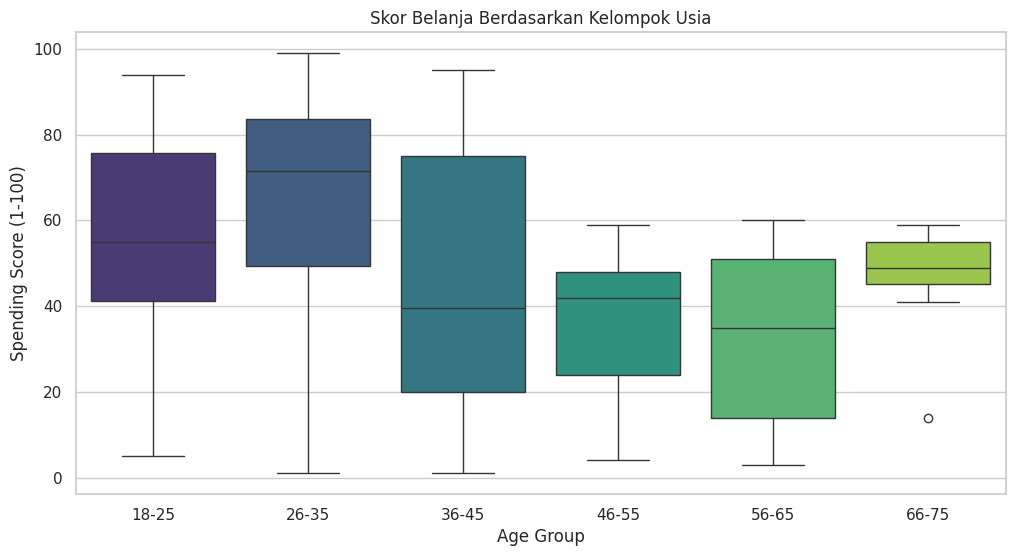

In [165]:
# Analisis Kelompok Usia
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75'])
print("\nDistribusi Kelompok Usia:")
print(df['Age Group'].value_counts())

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Skor Belanja Berdasarkan Kelompok Usia')
plt.show()


Pelanggan dengan Skor Belanja Tinggi (>90):
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
7             8  Female   23                  18                      94   
11           12  Female   35                  19                      99   
19           20  Female   35                  23                      98   
33           34    Male   18                  33                      92   
41           42    Male   24                  38                      92   
123         124    Male   39                  69                      91   
127         128    Male   40                  71                      95   
141         142    Male   32                  75                      93   
145         146    Male   28                  77                      97   
163         164  Female   31                  81                      93   
167         168  Female   33                  86                      95   
173         174    Male   36               

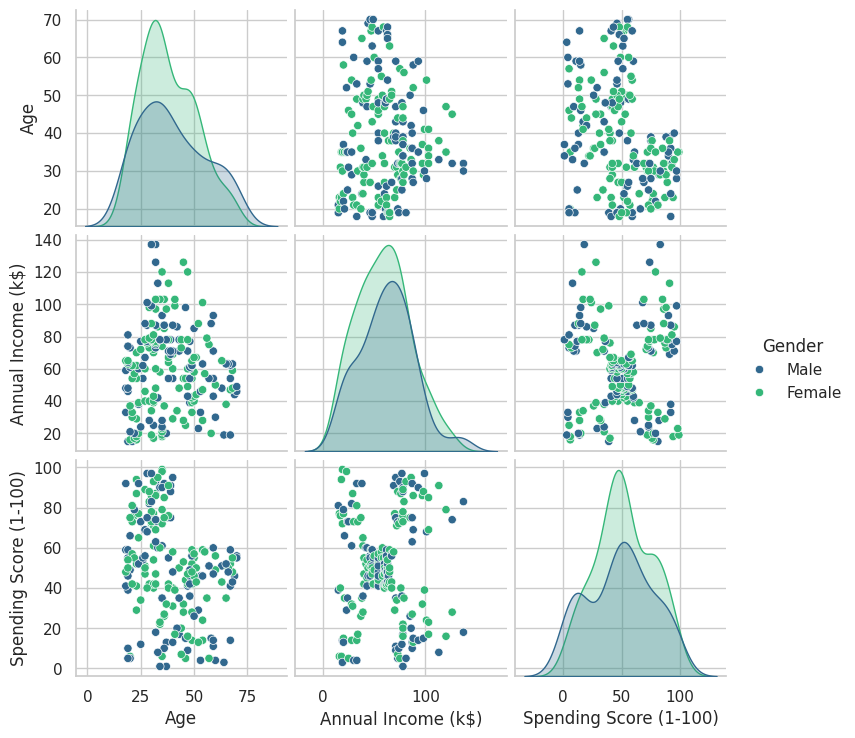

In [166]:
# Analisis Skor Belanja Ekstrem
high_spenders = df[df['Spending Score (1-100)'] > 90]
low_spenders = df[df['Spending Score (1-100)'] < 10]
print("\nPelanggan dengan Skor Belanja Tinggi (>90):")
print(high_spenders)
print("\nPelanggan dengan Skor Belanja Rendah (<10):")
print(low_spenders)

# Pair Plot untuk Analisis Multivariat
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', palette='viridis')
plt.show()

In [167]:
# Penanganan Missing Values
print("\nPemeriksaan Missing Values:")
print(df.isnull().sum())

# Jika ada missing values, lakukan penanganan:
df = df.dropna()  # Hapus baris dengan missing values
# atau
# df['Kolom'] = df['Kolom'].fillna(df['Kolom'].mean())  # Isi dengan mean/median/mode


Pemeriksaan Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Age Group                 4
dtype: int64


In [168]:
# Penanganan Duplikat Data
print("\nPemeriksaan Duplikat Data:")
print(df.duplicated().sum())

# Jika ada duplikat, hapus duplikat:
# df = df.drop_duplicates()


Pemeriksaan Duplikat Data:
0


In [169]:
# Encoding Variabel Kategorikal (Gender)
print("\nEncoding Variabel Kategorikal (Gender):")
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male: 1, Female: 0
print(df['Gender'].value_counts())


Encoding Variabel Kategorikal (Gender):
Gender
0    111
1     85
Name: count, dtype: int64


<ipython-input-169-379c182beae1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male: 1, Female: 0


In [170]:
# Penanganan Outlier
print("\nPemeriksaan Outlier pada Annual Income (k$):")
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Annual Income (k$)'] < lower_bound) | (df['Annual Income (k$)'] > upper_bound)]
print("Outlier pada Annual Income (k$):")
print(outliers)


Pemeriksaan Outlier pada Annual Income (k$):
Outlier pada Annual Income (k$):
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
198         199       1   32                 137                      18   
199         200       1   30                 137                      83   

    Age Group  
198     26-35  
199     26-35  


In [171]:
# Jika ingin menghapus outlier:
df = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]

In [172]:
# Pembuatan Fitur Tambahan (Opsional)
print("\nPembuatan Fitur Tambahan (Opsional):")
df['Age Group'] = pd.cut(df['Age'], bins=[-np.inf, 20, 30, 40, 50, 60, np.inf], labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])
print(df['Age Group'].value_counts())


Pembuatan Fitur Tambahan (Opsional):
Age Group
30-40    59
20-30    44
40-50    38
50-60    23
>60      17
<20      13
Name: count, dtype: int64


<ipython-input-172-8befe902b526>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age'], bins=[-np.inf, 20, 30, 40, 50, 60, np.inf], labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])


In [173]:
# Ringkasan Data yang Sudah Diproses
print("\nRingkasan Data yang Sudah Diproses:")
print(df.head())
print(df.info())


Ringkasan Data yang Sudah Diproses:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

  Age Group  
0       <20  
1     20-30  
2       <20  
3     20-30  
4     30-40  
<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              194 non-null    int64   
 1   Gender                  194 non-null    int64   
 2   Age                     194 non-null    int64   
 3   Annual Income (k$)      194 non-null    int64   
 4   Spendi

In [174]:
# Persiapan Data untuk Clustering
# Pilih fitur yang akan digunakan untuk clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [175]:
# Model Clustering 1: K-Means
print("\n=== Model Clustering 1: K-Means ===")

# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


=== Model Clustering 1: K-Means ===


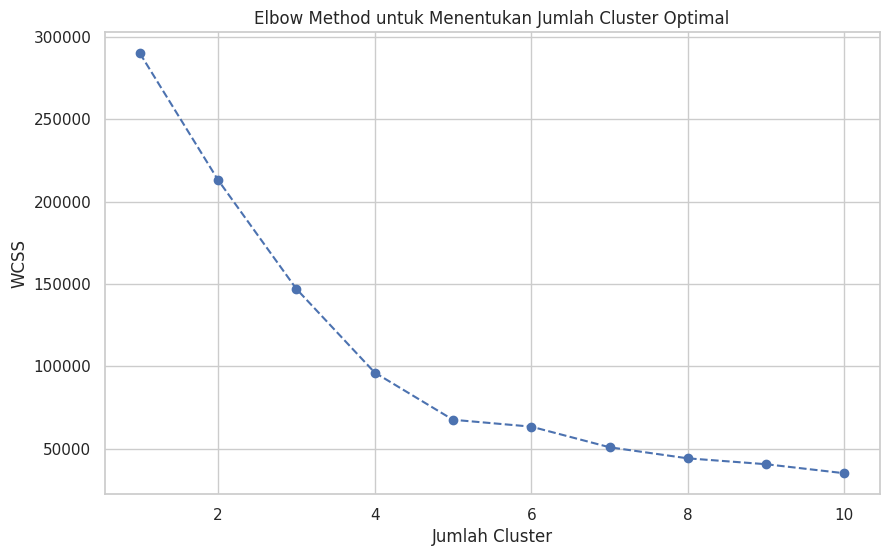

In [176]:
# Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [177]:
# Pilih jumlah cluster optimal (misalnya, 5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

In [178]:
# Evaluasi K-Means menggunakan Silhouette Score
kmeans_score = silhouette_score(X, df['KMeans_Cluster'])
print(f"Silhouette Score untuk K-Means: {kmeans_score:.2f}")

Silhouette Score untuk K-Means: 0.45


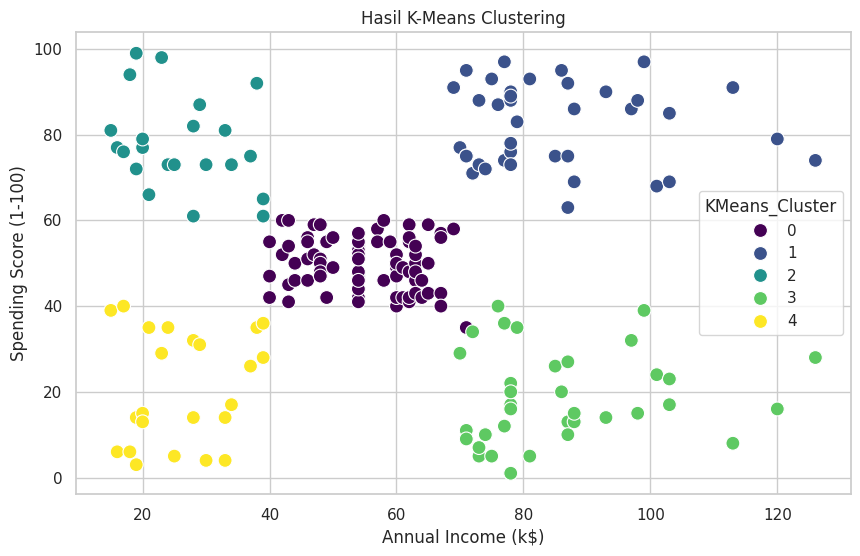

In [179]:
# Visualisasi Hasil K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='viridis', s=100)
plt.title('Hasil K-Means Clustering')
plt.show()

In [180]:
# Model Clustering 2: Agglomerative Hierarchical Clustering
print("\n=== Model Clustering 2: Agglomerative Hierarchical Clustering ===")


=== Model Clustering 2: Agglomerative Hierarchical Clustering ===


In [181]:
# Pilih jumlah cluster yang sama seperti K-Means (5)
agglo = AgglomerativeClustering(n_clusters=n_clusters)
df['Agglo_Cluster'] = agglo.fit_predict(X)

In [182]:
# Evaluasi Agglomerative Clustering menggunakan Silhouette Score
agglo_score = silhouette_score(X, df['Agglo_Cluster'])
print(f"Silhouette Score untuk Agglomerative Clustering: {agglo_score:.2f}")

Silhouette Score untuk Agglomerative Clustering: 0.45


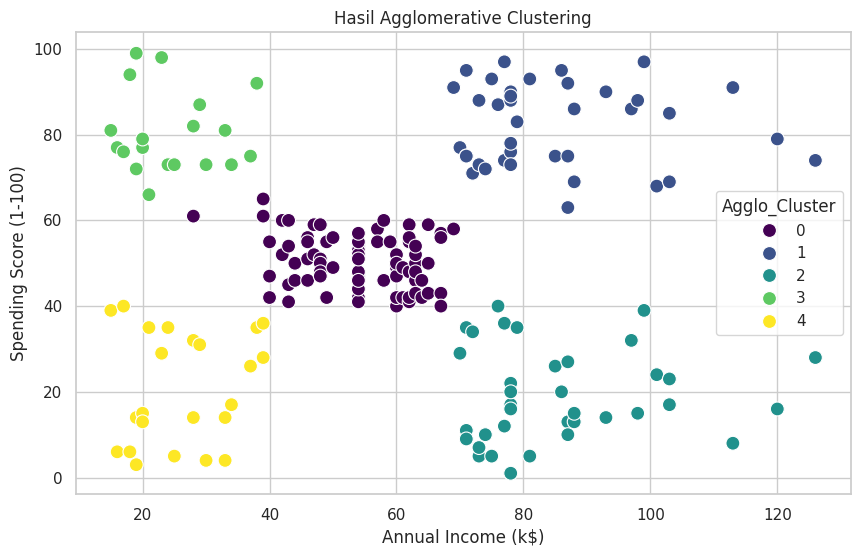

In [183]:
# Visualisasi Hasil Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agglo_Cluster', data=df, palette='viridis', s=100)
plt.title('Hasil Agglomerative Clustering')
plt.show()

In [184]:
# Model Clustering 3: DBSCAN
print("\n=== Model Clustering 3: DBSCAN ===")


=== Model Clustering 3: DBSCAN ===


In [185]:
# Standarisasi data untuk DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [186]:
# Menentukan parameter DBSCAN (eps dan min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [187]:
# Evaluasi DBSCAN menggunakan Silhouette Score (hanya jika ada lebih dari 1 cluster)
if len(np.unique(df['DBSCAN_Cluster'])) > 1:
    dbscan_score = silhouette_score(X_scaled, df['DBSCAN_Cluster'])
    print(f"Silhouette Score untuk DBSCAN: {dbscan_score:.2f}")
else:
    print("DBSCAN hanya menghasilkan 1 cluster. Silhouette Score tidak dapat dihitung.")

Silhouette Score untuk DBSCAN: 0.20


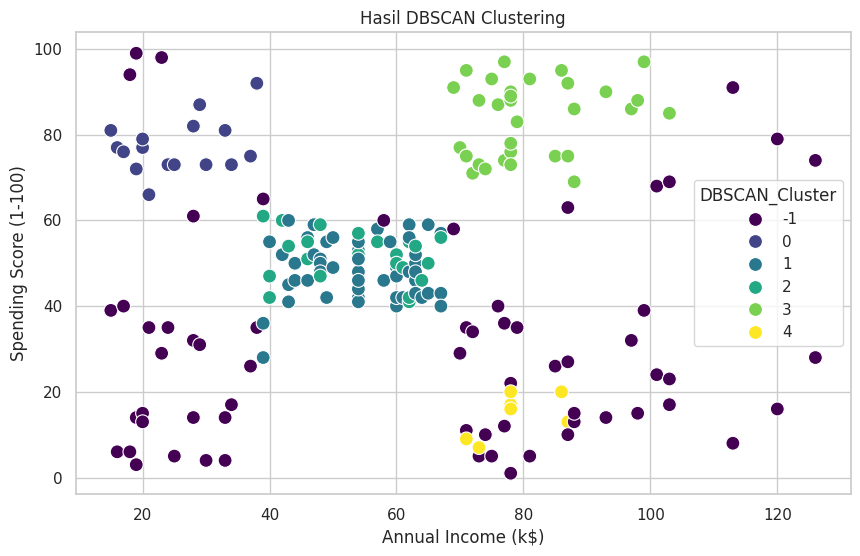

In [188]:
# Visualisasi Hasil DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis', s=100)
plt.title('Hasil DBSCAN Clustering')
plt.show()

In [189]:
# Analisis Hasil Clustering
print("\n=== Analisis Hasil Clustering ===")

# Ringkasan Hasil Clustering
print("\nRingkasan Hasil Clustering:")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'KMeans_Cluster', 'Agglo_Cluster', 'DBSCAN_Cluster']].head())

# Perbandingan Silhouette Score
print("\nPerbandingan Silhouette Score:")
print(f"- K-Means: {kmeans_score:.2f}")
print(f"- Agglomerative Clustering: {agglo_score:.2f}")
if len(np.unique(df['DBSCAN_Cluster'])) > 1:
    print(f"- DBSCAN: {dbscan_score:.2f}")
else:
    print("- DBSCAN: Tidak dapat dihitung (hanya 1 cluster)")


=== Analisis Hasil Clustering ===

Ringkasan Hasil Clustering:
   Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster  \
0   19                  15                      39               4   
1   21                  15                      81               2   
2   20                  16                       6               4   
3   23                  16                      77               2   
4   31                  17                      40               4   

   Agglo_Cluster  DBSCAN_Cluster  
0              4              -1  
1              3               0  
2              4              -1  
3              3               0  
4              4              -1  

Perbandingan Silhouette Score:
- K-Means: 0.45
- Agglomerative Clustering: 0.45
- DBSCAN: 0.20
